<a href="https://colab.research.google.com/github/Dennieeeee/Heart-Disease/blob/master/Medical_Cost_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

<strong>Data Source:</strong> https://www.kaggle.com/mirichoi0218/insurance

<strong>Columns:</strong>

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# convert categorical variables to numerical values (binary)
from sklearn.preprocessing import LabelEncoder
# Linear Regression
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor as rfr
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
# Hypothesis Test
import scipy.stats as stats

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# EDA

Questions for subplots:
1. https://stackoverflow.com/questions/54508045/how-the-add-subplotnrows-ncols-index-works
2. https://www.kaggle.com/subinium/simple-matplotlib-visualization-tips

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


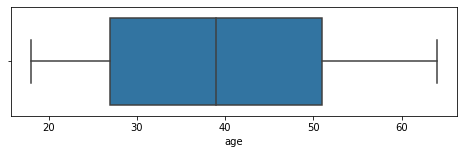

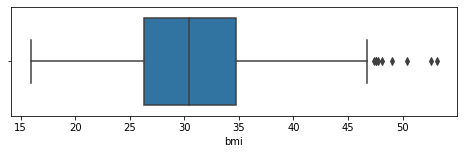

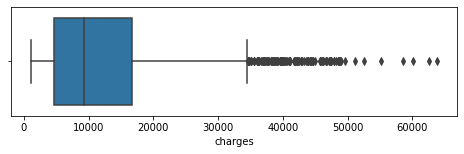

In [6]:
plt.figure(figsize=(8,2))
sns.boxplot(df['age'])

plt.figure(figsize=(8,2))
sns.boxplot(df['bmi'])

plt.figure(figsize=(8,2))
sns.boxplot(df['charges'])

Trim Outliers

In [7]:
#Trim outliers:
starting_percentile = df['charges'].quantile(.05)
ending_percentile = df['charges'].quantile(.95)
price_outliers_df = df.loc[((df['charges'] <= starting_percentile) | (df['charges'] >= ending_percentile))]
df = df.loc[((df['charges'] > starting_percentile) & (df['charges'] < ending_percentile))]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Distribution of charges')

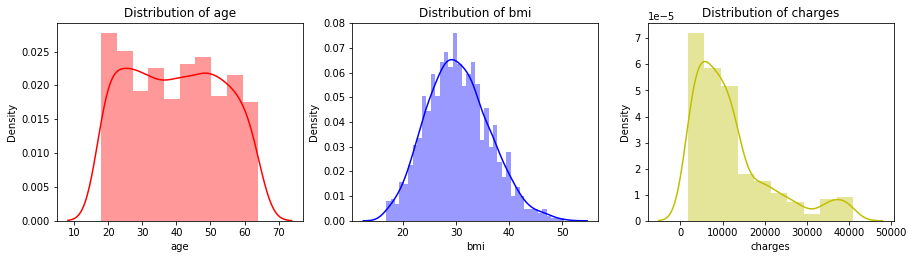

In [8]:
f= plt.figure(figsize=(15,8))

ax=f.add_subplot(231)
sns.distplot(df['age'],bins=10,color='r',ax=ax)
ax.set_title('Distribution of age')

ax=f.add_subplot(232)
sns.distplot((df['bmi']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of bmi')


ax=f.add_subplot(233)
sns.distplot(df['charges'],bins=10,color='y',ax=ax)
ax.set_title('Distribution of charges')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of bmi by region')

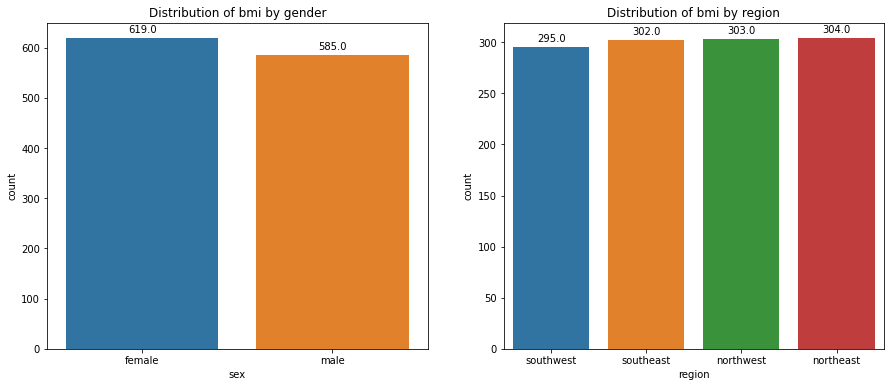

In [9]:

f= plt.figure(figsize=(15,6))

ax=f.add_subplot(121)
splot = sns.countplot(df['sex'], )
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax.set_title('Distribution of bmi by gender')

ax=f.add_subplot(122)
splot = sns.countplot(df['region'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax.set_title('Distribution of bmi by region')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Age vs. Charges in Different Regions')

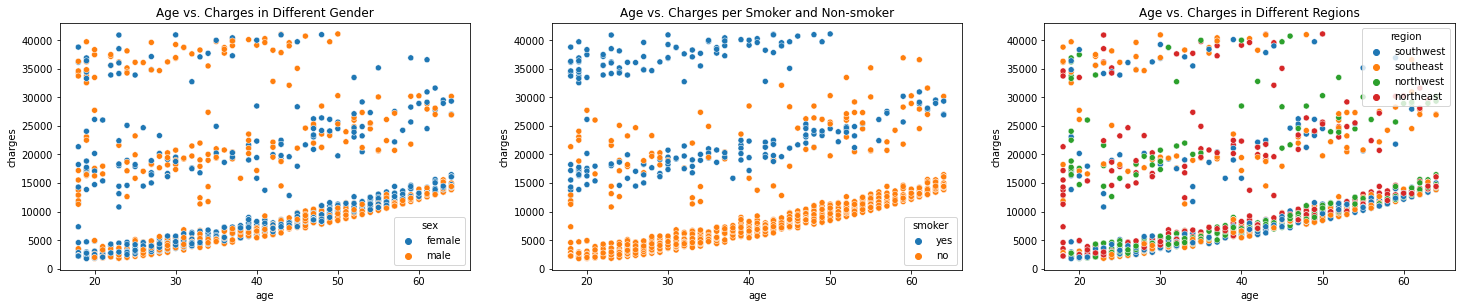

In [10]:
f= plt.figure(figsize=(25,10))

ax=f.add_subplot(231)
ax.set_title('Age vs. Charges in Different Gender')
sns.scatterplot('age', 'charges', data=df, hue='sex')

ax=f.add_subplot(232)
sns.scatterplot('age', 'charges', data=df, hue='smoker')
ax.set_title('Age vs. Charges per Smoker and Non-smoker')

ax=f.add_subplot(233)
sns.scatterplot('age', 'charges', data=df, hue='region')
ax.set_title('Age vs. Charges in Different Regions')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


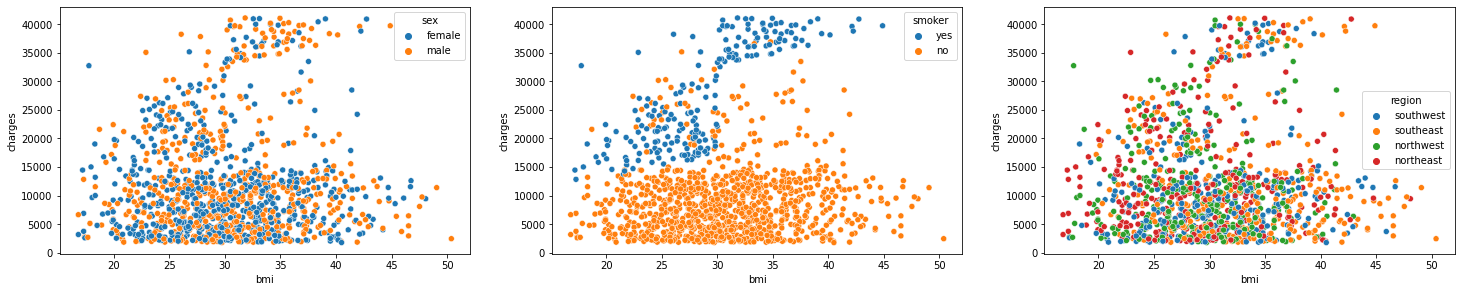

In [11]:
f= plt.figure(figsize=(25,10))

ax=f.add_subplot(231)
sns.scatterplot('bmi', 'charges', data=df, hue='sex')

ax=f.add_subplot(232)
sns.scatterplot('bmi', 'charges', data=df, hue='smoker')

ax=f.add_subplot(233)
sns.scatterplot('bmi', 'charges', data=df, hue='region')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


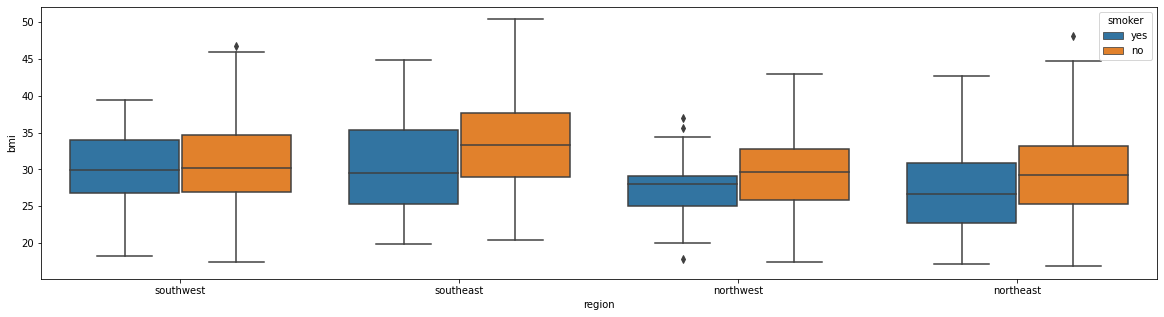

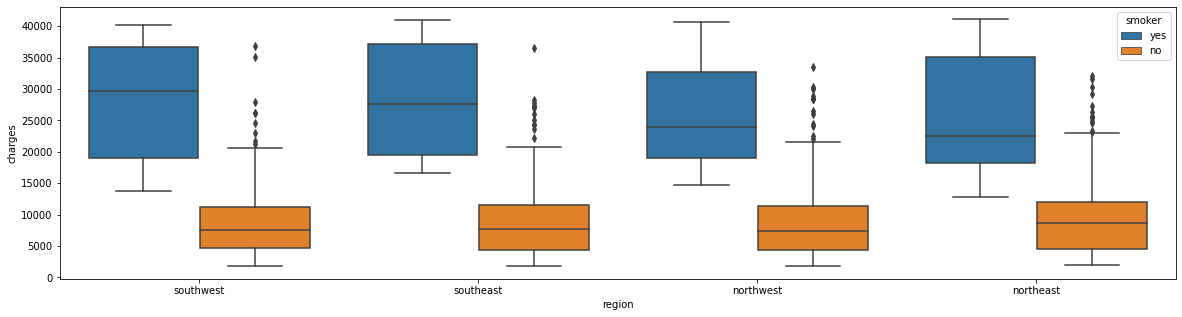

In [12]:
plt.figure(figsize=(20,5))
sns.boxplot(df['region'], df['bmi'], hue=df['smoker'])

plt.figure(figsize=(20,5))
sns.boxplot(df['region'], df['charges'], hue=df['smoker'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


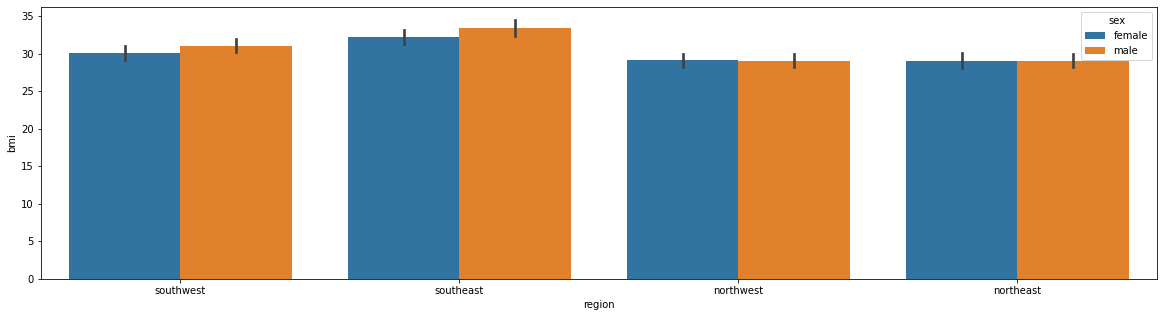

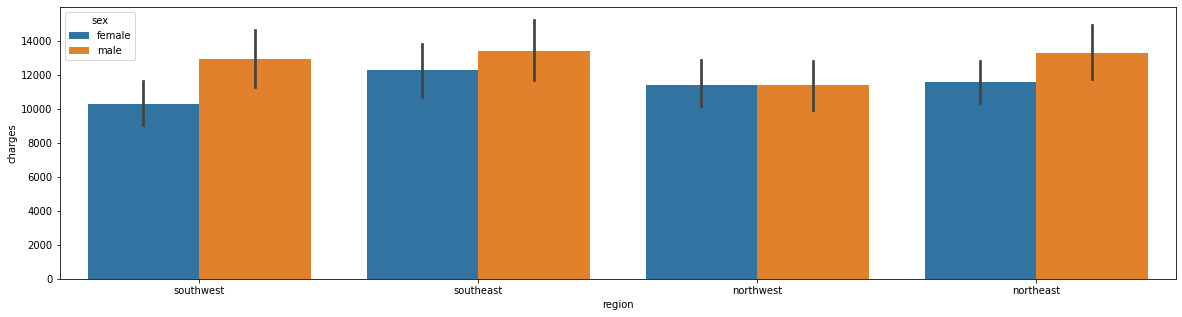

In [13]:
plt.figure(figsize=(20,5))
sns.barplot(df['region'], df['bmi'], hue=df['sex'])

plt.figure(figsize=(20,5))
sns.barplot(df['region'], df['charges'], hue=df['sex'])

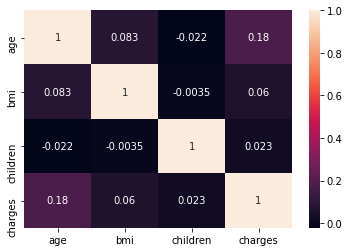

In [14]:
sns.heatmap(df.corr(), annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


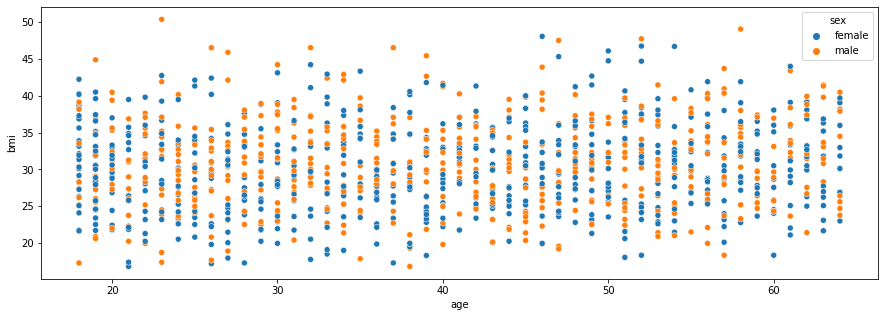

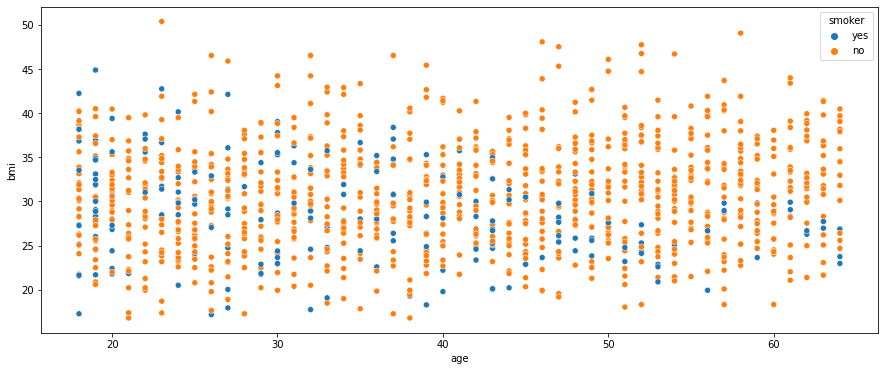

In [15]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['age'], df['bmi'], hue = df['sex'])

plt.figure(figsize=(15,6))
sns.scatterplot(df['age'], df['bmi'], hue = df['smoker'])

# Linear Regression

In [16]:
##Converting category labels into numerical using LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [17]:
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-7354.813249759585
[  208.18334468   363.71943303   243.71587409   476.54835488
 19816.96129176  -323.21322646]
0.649447440275412


### Ridge

In [18]:
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-7311.256642103066
[  207.81820137   367.72113859   243.10303273   476.23429521
 19740.04237546  -322.7062117 ]
0.6489972637914982


### Lasso

In [19]:
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-7353.450076764775
[  208.17591639   363.02013131   243.69611477   476.40991798
 19815.52356136  -323.03235704]
0.6494474327549298


### Random Forest Regressor

In [20]:
x = df.drop(['charges'], axis=1)
y = df.charges
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred, y_train),
       metrics.r2_score(y_test,x_test_pred, y_test)))


MSE train data: 3310657.907, MSE test data: 24784368.088
R2 train data: 0.956, R2 test data: 0.705


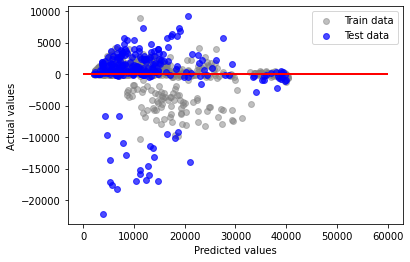

In [21]:

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

Feature importance ranking


1.smoker(0.526846)
2.bmi(0.222115)
3.age(0.183349)
4.children(0.031928)
5.region(0.023459)
6.sex(0.012304)


<BarContainer object of 6 artists>

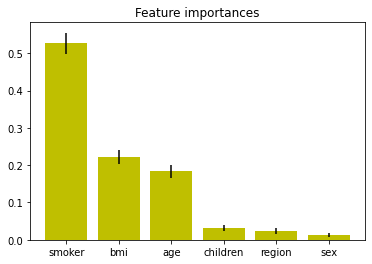

In [22]:
print('Feature importance ranking\n\n')

importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")


### Polynomial Regression

In [23]:

x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

1486.9770792911058
[ 0.00000000e+00 -8.89659434e+01  1.39791975e+02  9.77951719e+02
 -9.17402016e+03  4.29615949e+00 -4.52769252e-01  2.79439809e+00
 -4.59174270e+01 -1.64941314e+00  1.05404426e+00  1.38522091e+03
 -1.15833588e+02  4.81598217e+01 -9.17402016e+03]
0.7696130989994427


# Model Evaluation

In [24]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 3044.2391557244373
Mean Squared Error: 24532876.1964021
Root Mean Squared Error: 4953.06735229818


In [25]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df_predicted

,Actual,Predicted
545,23807.24060,26493.675493
6,8240.58960,9644.871518
493,12574.04900,13807.605767
303,4349.46200,6481.307480
1075,4562.84210,6285.615107
...,...,...
842,36021.01120,31972.042000
990,3378.91000,4921.868489
1321,28101.33305,30076.040147
535,6067.12675,7447.813752


# Hypothesis Testing

Re-load the csv file because the original file got encoded

In [39]:
df = pd.read_csv('insurance.csv')

In [40]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We couldn't see an obvious affect of gender on bmi back in the EDA section.

Does different sex has an impact on bmi? (use T test)

In [47]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(df[df.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(df[df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(4)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(4)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


Are smoking habits different among different genders?

In [48]:
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


Are smoking habits different for people in different regions?

In [49]:
# Chi_square test to check if smoking habits are different for people of different regions
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['smoker'], df['region'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

crosstab

Region has no effect on smoking habits as the p_value (0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58
